### Read SQL

In [104]:
from database import DB
import pandas as pd

database = DB()
database.connect()

keyword_SQL = '''
SELECT 
download.keyword, download.model_type, download.user_id, 
download.created_at,download.count,'download' as "action"
FROM admin_statistic_downloads_by_session_keyword as download
INNER JOIN users ON download.user_id = users.id
AND users.role != 16

UNION ALL

SELECT 
play.keyword, play.music_type, play.user_id, 
play.created_at,play.count, 'play' as "action"
FROM admin_statistic_plays_by_session_keyword as play
INNER JOIN users ON play.user_id = users.id
AND users.role != 16

ORDER by user_id
'''

keyword = pd.read_sql(keyword_SQL,database.connect()[1])

In [105]:
# null 제거
# 나중에 null 값만 모아서 회원가입하지 않은 유저라고 판단합니다.
dropna_keyword = keyword.dropna()
dropna_keyword.head()

keyword   model_type  user_id                 created_at  count action
0            비트  Music::Song       12 2021-02-16 10:52:30.089283     31   play
1           스포츠  Music::Song       12 2021-02-16 10:46:57.467660     26   play
2  어두운+밤이되면(MR)  Music::Song       30 2021-01-28 16:37:16.963209      1   play
3           스포츠  Music::Song      425 2021-02-25 00:21:20.472397     19   play
4            잔잔  Music::Song      621 2021-02-05 23:22:29.214013      3   play

In [106]:
# 유저별 플레이 순서를 keyword별로 순서를 확인합니다.
play_keyword = dropna_keyword.copy()
play_keyword['user_id'] = play_keyword['user_id'].apply(int)

play_keyword['model_type'] = play_keyword['model_type'].apply(lambda x: 'song' if x=='Music::Song' else 'sfx')

In [107]:
play_keyword = play_keyword.sort_values(['user_id','created_at'],ascending=True)

In [108]:
play_keyword['keyword'] = play_keyword['keyword'].apply(lambda x: x.replace("+", ' '))
# play_keyword['keyword'] = play_keyword['keyword'].apply(lambda x: x[:-1] if x[-1]==',' else x)

In [109]:
# 송만 선택합니다.
song_keyword = play_keyword[play_keyword['model_type'] == 'song']

In [110]:
keyword = song_keyword .groupby('user_id').aggregate(lambda tdf: tdf.tolist()).loc[:,['keyword', 'model_type', 'action']]
# keyword = play_keyword.groupby('user_id').aggregate(lambda tdf: tdf.tolist()).loc[:,['keyword', 'model_type', 'action']]

In [111]:
keyword['keyword_unique'] = keyword['keyword'].apply(lambda x: list(set(x)))

In [112]:
keyword['length'] = keyword['keyword_unique'].apply(lambda x: len(x))

In [113]:
# keyword = keyword[keyword['length'] > 15]

In [114]:
keyword

keyword  \
user_id                                                      
12                                               [스포츠, 비트]   
30                                          [어두운 밤이되면(MR)]   
425                                                  [스포츠]   
621      [잔잔, 잔잔, 달달, 달달, 여행 Vlog, 여행 Vlog, 펫방, 키즈, 잔잔,...   
738                                                [흐르는 물]   
...                                                    ...   
56671                                             [집중, 좌절]   
56673                                             [펫방, 펫방]   
56679                                 [미쳐 날뛰고 있습니다, 통수 엔딩]   
56683                                  [띠용 하고 튀어오르는 맑은 점프]   
56684                       [공격, 기모으는소리, 마법, 게임, electric]   

                                                model_type  \
user_id                                                      
12                                            [song, song]   
30                                                  [song]   
425                                                 [song]   
621      [song, song, song, song, song, song, song, son...   
738                                                 [song]   
...                                                    ...   
56671                                         [song, song]   
56673                                         [song, song]   
56679                                         [song, song]   
56683                                               [song]   
56684                       [song, song, song, song, song]   

                                                    action  \
user_id                                                      
12                                            [play, play]   
30                                                  [play]   
425                                                 [play]   
621      [play, play, play, download, play, play, play,...   
738                                                 [play]   
...                                                    ...   
56671                                         [play, play]   
56673                                     [download, play]   
56679                                         [play, play]   
56683                                               [play]   
56684                       [play, play, play, play, play]   

                                          keyword_unique  length  
user_id                                                           
12                                             [비트, 스포츠]       2  
30                                        [어두운 밤이되면(MR)]       1  
425                                                [스포츠]       1  
621      [vlog, 달달, 키즈, 아기강아지, 잔잔, 여행 Vlog, 기대, 펫방, 귀여운]       9  
738                                              [흐르는 물]       1  
...                                                  ...     ...  
56671                                           [좌절, 집중]       2  
56673                                               [펫방]       1  
56679                               [미쳐 날뛰고 있습니다, 통수 엔딩]       2  
56683                                [띠용 하고 튀어오르는 맑은 점프]       1  
56684                     [electric, 기모으는소리, 게임, 공격, 마법]       5  

[4054 rows x 5 columns]

### keyword 2-D visualize

In [115]:
# 폰트 설정 방법 1
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='Malgun Gothic') # For Windows

%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.

c:\users\taka\anaconda3\envs\mewpot\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
c:\users\taka\anaconda3\envs\mewpot\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\taka\anaconda3\envs\mewpot\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


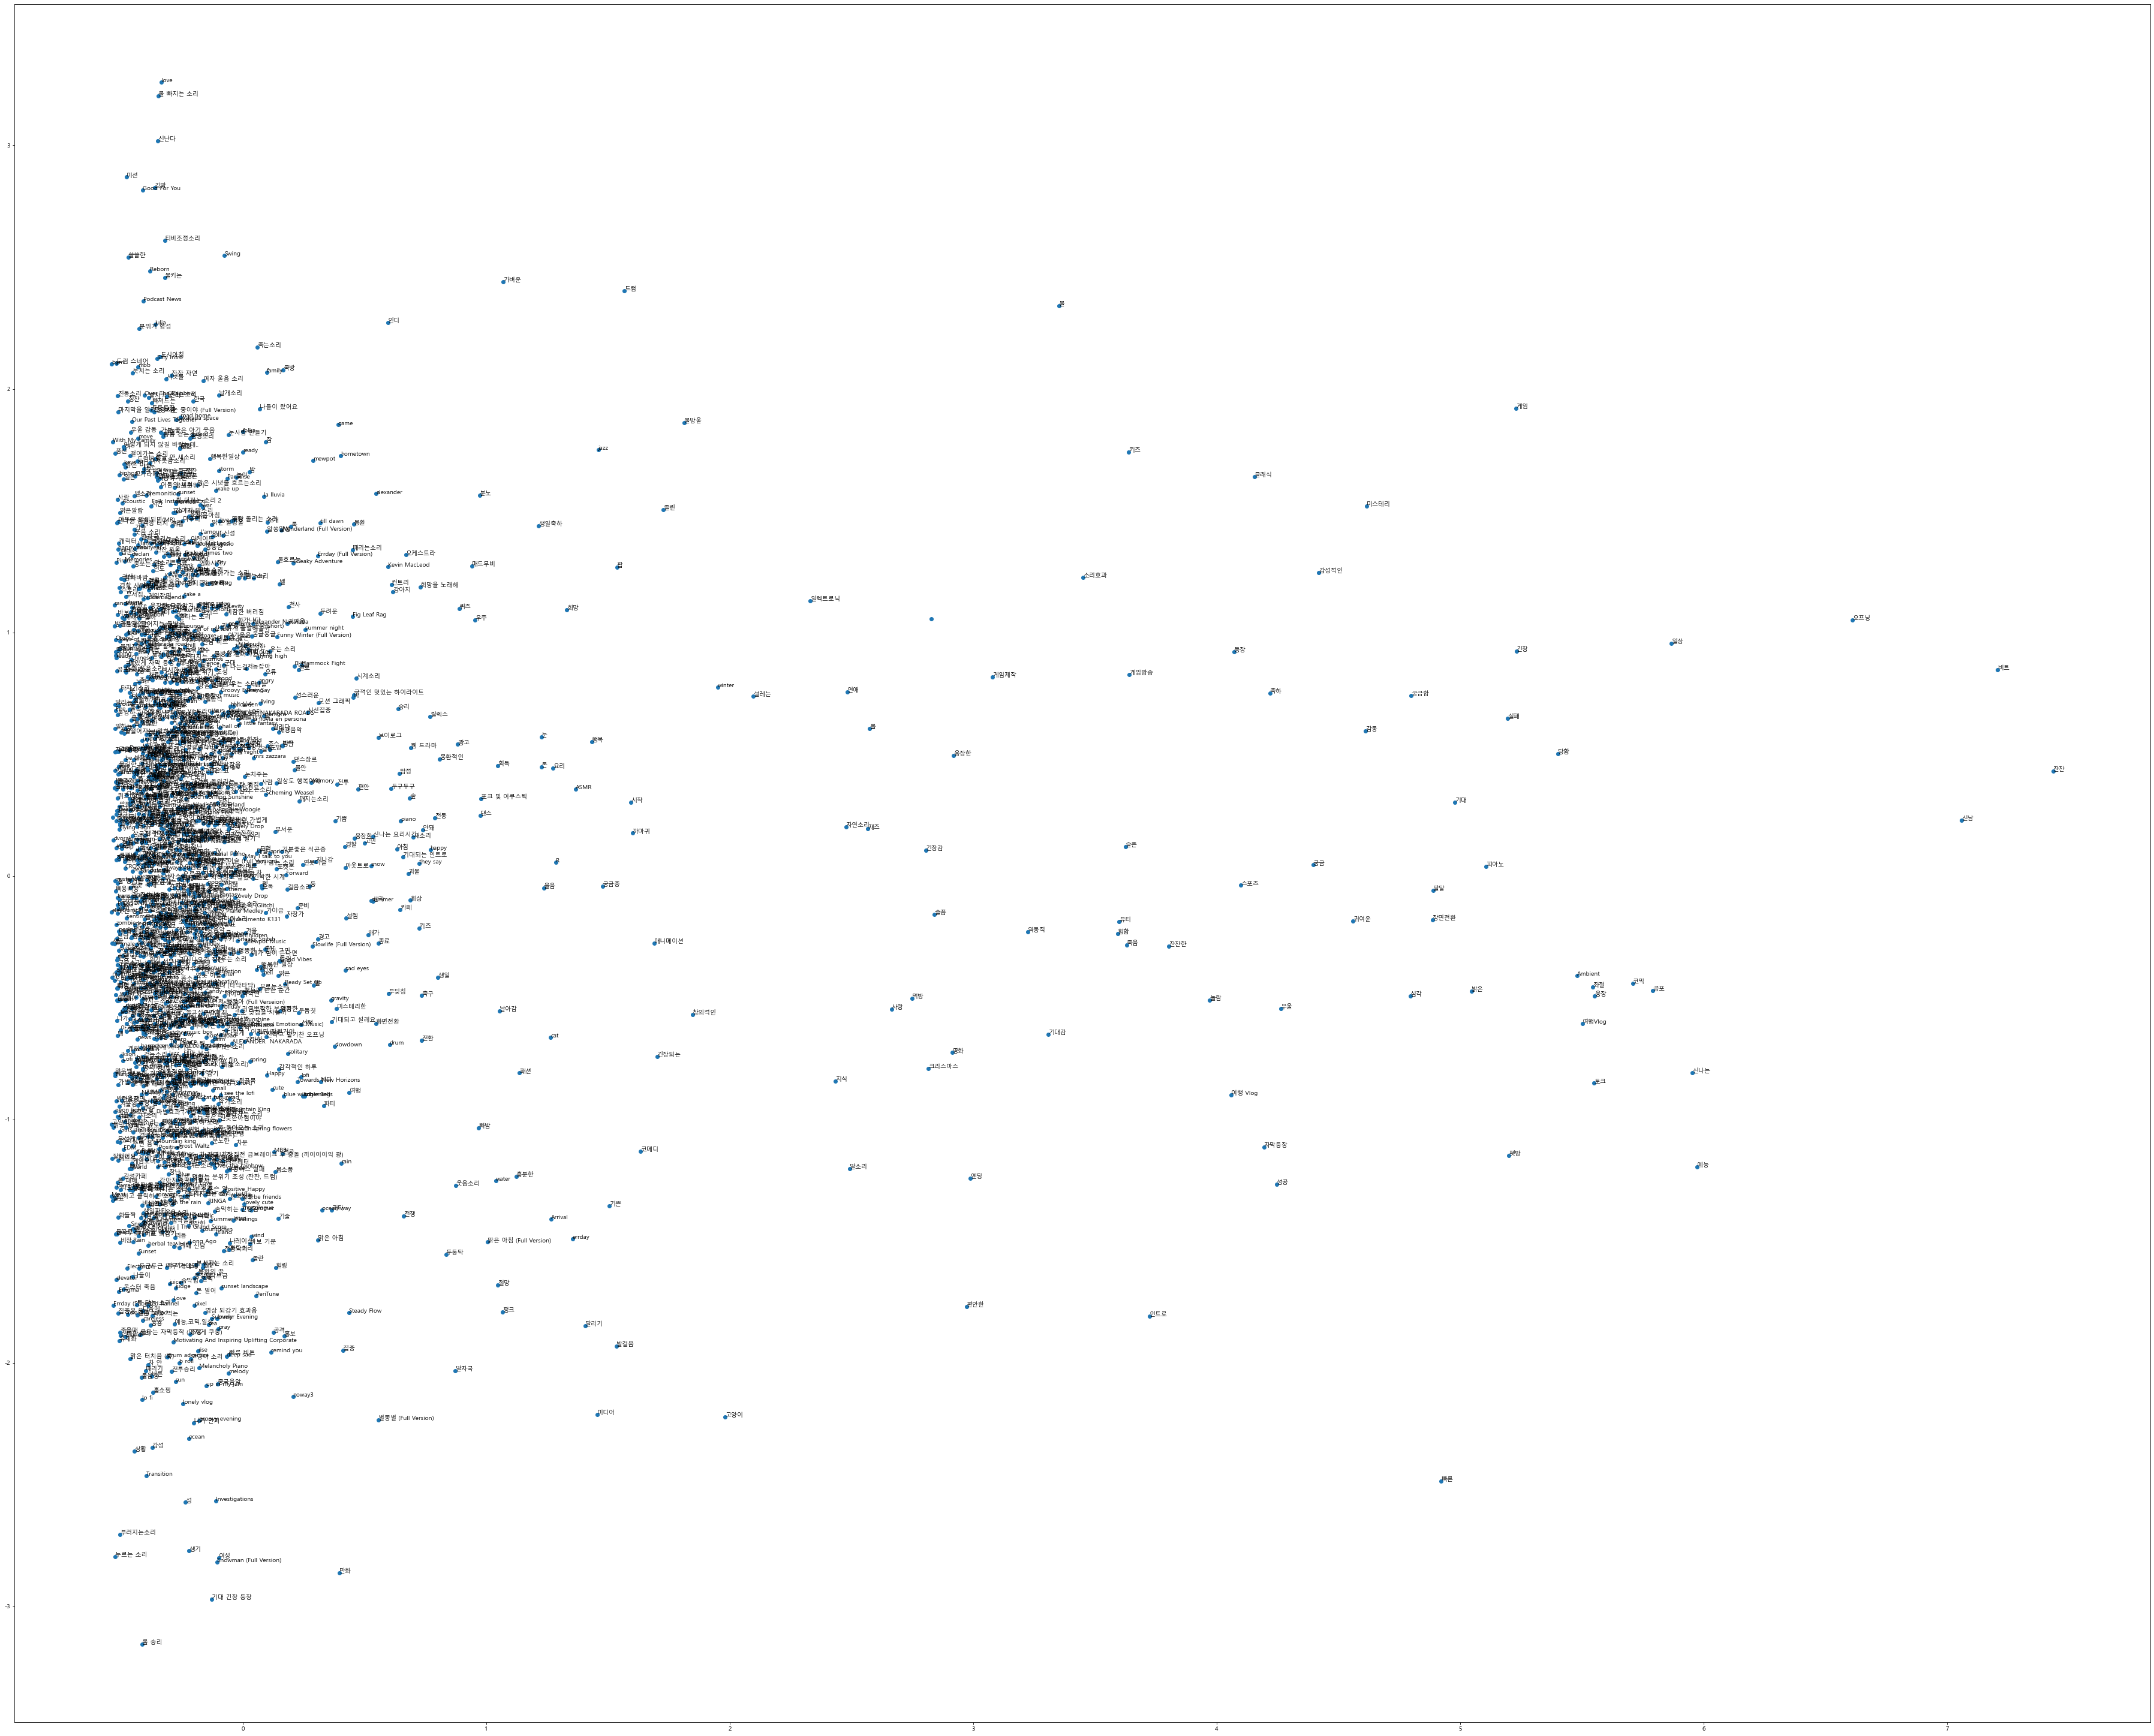

In [116]:
# pip install --upgrade gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = keyword['keyword_unique'].tolist()
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

#scaler 적용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(result)
result = scaler.transform(result)


# create a scatter plot of the projection
pyplot.figure(figsize=(50, 50))
pyplot.scatter(result[:, 0], result[:, 1])


####
# import matplotlib.ticker as ticker
# ax=pyplot.axes()

# ax.xaxis.set_major_locator(ticker.AutoLocator())
# ax.yaxis.set_major_locator(ticker.AutoLocator())

# ax.xaxis.set_minor_locator(ticker.AutoLocator())
# ax.yaxis.set_minor_locator(ticker.AutoLocator())


#### 

words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.tight_layout()
pyplot.gca().set_aspect('equal', adjustable='box')
pyplot.show()

In [ ]:
# 폰트 설정 방법 1
import matplotlib.pyplot as plt

# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.

In [32]:
from database import DB
import pandas as pd

database = DB()
database.connect()

sub_SQL = '''
SELECT 
sub.user_id, sub.created_at, sub.item_type
FROM payment_approved_items as sub
INNER JOIN users ON sub.user_id = users.id
WHERE sub.item_type = 'Payment::SubscriptionProduct'
AND users.role != 16
ORDER BY user_id ASC 
'''

subscription = pd.read_sql(sub_SQL,database.connect()[1])
subscription['count'] = 1

In [36]:
pivot_sub = pd.pivot_table(subscription, index = ['user_id'],
              values = ['created_at', 'count'],
              aggfunc = ['min', 'sum']).iloc[:,1:].reset_index()
pivot_sub.columns = ['user_id','created_at', 'count']

In [38]:
pivot_sub['action'] = 'subscription'
pivot_sub['keyword'] = 'subscription'
pivot_sub['model_type'] = 'subscription'

In [39]:
pivot_sub = pivot_sub[['keyword', 'model_type','user_id','created_at', 'count', 'action']]

In [59]:
user_action = pd.concat([play_keyword, pivot_sub]).sort_values(['user_id', 'created_at'])

In [73]:
user_action = user_action[(user_action['keyword'] != '') & (user_action['keyword'] != '+') ]

In [74]:
result = user_action.groupby('user_id').aggregate(lambda tdf: tdf.tolist()).loc[:,['keyword', 'model_type', 'action']]

result['length'] = result['keyword'].apply(lambda x: len(x))
result = result[result['length'] != 1]

In [75]:
result
result.to_excel('user_search.xlsx')